# Logistic Regression

### Odds function

In a binary classification problem, let $p$ be the probability of the positive class.
The odds functions is defined as follows:
$$
\text{odds} = \frac{p}{1 - p}
$$

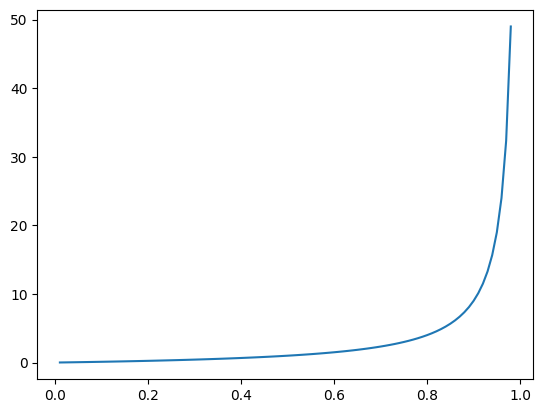

In [36]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01, 0.99, 0.01)
y = p / (1 - p)
plt.plot(p, y)


### The logit function

We define the *logit* function to be the natural logarithm of the odds function:

$$
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right)
$$

The logarithm maps the probability $p$ from the range $(0, 1)$ to the entire real line.

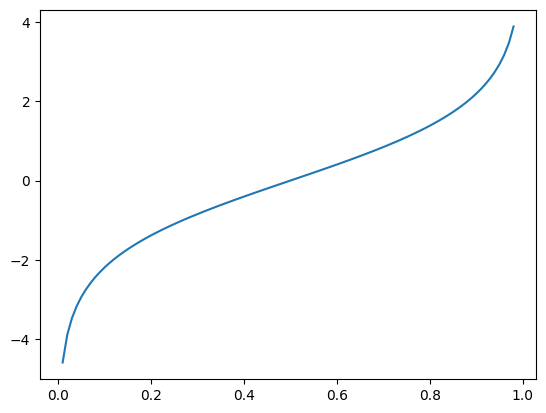

In [37]:
plt.plot(p, np.log(y))

## Sigmoid function

If $p$ is the probability of an object $x$ beign in the positive class ($y = 1$), that is $p(y = 1 | x)$ then we can use this fact to describe a linear relationship between the features and the probability of the positive class:
$$
\text{logit}(p(y = 1 | x)) = w_0 x_0 + w_1 x_1 + \ldots + w_n x_n = \sum_{i=0}^{n} w_i x_i = w^T x
$$

$$
z = \ln \left( \frac{p}{1 - p} \right) \implies \phi(z) = \frac{1}{1 + e^{-z}}
$$

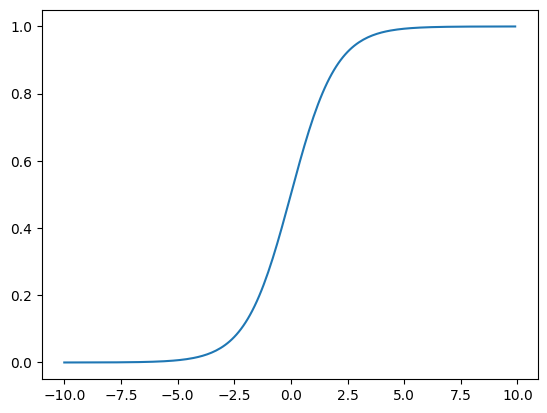

In [38]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)

## Logistic Regression

We can plug the sigmoid function at the output of the perceptron, to obtain the probability that an object belongs to the positive class. We can choose to assign the class label based on a threshold, for example, if the probability is greater than 0.5, we assign the positive class, otherwise, we assign the negative class.

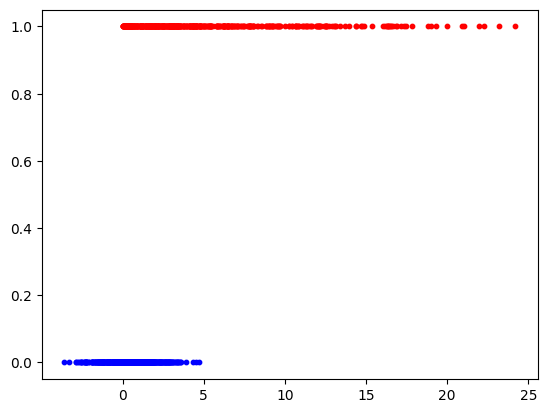

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


n_samples = 512
seed = 69
np.random.seed(seed)


x11 = np.random.exponential(scale=5.5, size=n_samples)
x12 = np.random.normal(scale=1.5, loc=0.5, size=n_samples)

y1 = np.ones(n_samples)
y2 = np.zeros(n_samples)


plt.scatter(x11, y1, color='red', s = 10)
plt.scatter(x12, y2, color='blue', s = 10)

In [59]:
w = np.random.randn(2)

X = np.stack((np.ones(2 * n_samples), np.concatenate((x11, x12))), axis=1)
Y = np.concatenate((y1, y2))


eta = 1e-2
batch_size = 32
max_epoch = 1000
epoch = 0

error_epoch = np.zeros(max_epoch)

for epoch in range(max_epoch):
    output = sigmoid(np.dot(X, w))
    cost = -Y @ np.log(output)
    cost -= (1 - Y) @ np.log(1 - output)
    error_epoch[epoch] = cost
    errors = Y - output
    rand_perm = np.random.permutation(range(Y.shape[0]))
    X = X[rand_perm, :]
    Y = Y[rand_perm]

    for j in range(0, Y.shape[0], batch_size):
        x_batch = X[j : j + batch_size, :]
        y_batch = Y[j : j + batch_size]

        output = sigmoid(x_batch @ w)
        errors = y_batch - output
        w = w + eta * x_batch.T @ errors

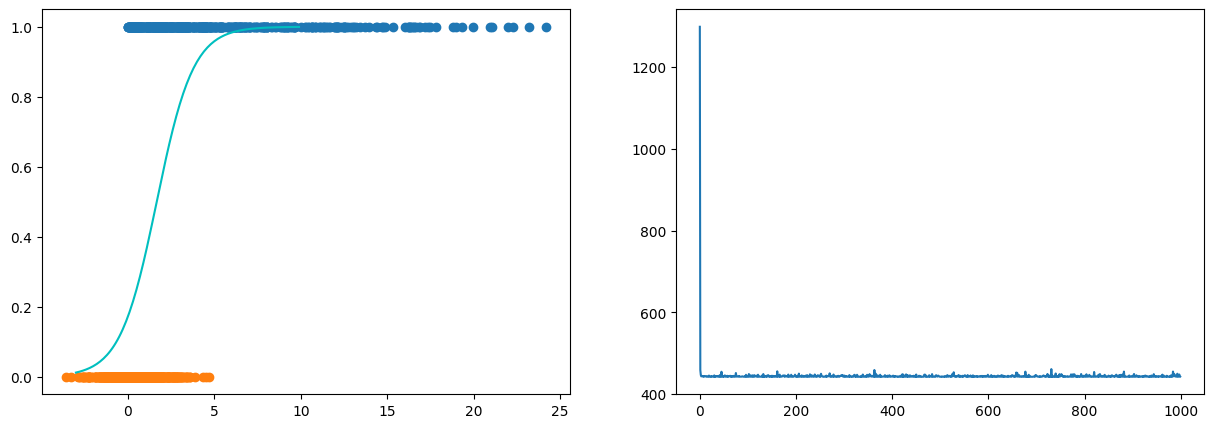

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
ax[0].scatter(x11, y1)
ax[0].scatter(x12, y2)

zz = np.arange(-3, 10, 0.1)
xx = np.stack((np.ones(len(zz)), zz), axis=1)

ax[0].plot(zz, sigmoid(xx @ w), c="c")
ax[1].plot(range(max_epoch), error_epoch)